# Cardano Stake Pool Performance Analysis 🏴‍☠️

## Overview

- We will be using various data science approaches to get a better understanding of Cardano stake pool performance using Python. We will use various linear regression models and statistical inference approaches to see what differences are there between performance of all pools, small vs. large, and what are the most important factors in predicting a stake pool's performance. This data science notebook will not go into the "rewards formula" of Cardano that many of us are familiar with, we will just be doing a basic analysis and explore the data we have available to us. 


In [1]:
#Importing packages
import os
import math as m
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

pd.options.mode.chained_assignment = None  # default='warn'


# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
pd.set_option('display.max_rows', 100)

In [2]:
pool_history_df = pd.read_csv('dataset.csv')

In [3]:
pool_history_df.shape[0]

18758

In [4]:
pool_history_df

,pool_id,pool_addr,epoch,roa,active_stake
0,c1ede3cc9133209466774d4826044e408db13d6fe6df75...,pool1c8k78ny3xvsfgenhf4yzvpzwgzxmz0t0um0h2xnn2...,266,10.249,527631485613
1,c1ede3cc9133209466774d4826044e408db13d6fe6df75...,pool1c8k78ny3xvsfgenhf4yzvpzwgzxmz0t0um0h2xnn2...,267,10.142,527631485613
2,c1ede3cc9133209466774d4826044e408db13d6fe6df75...,pool1c8k78ny3xvsfgenhf4yzvpzwgzxmz0t0um0h2xnn2...,268,0.000,527589680120
3,c1ede3cc9133209466774d4826044e408db13d6fe6df75...,pool1c8k78ny3xvsfgenhf4yzvpzwgzxmz0t0um0h2xnn2...,269,10.017,528340712813
4,c1ede3cc9133209466774d4826044e408db13d6fe6df75...,pool1c8k78ny3xvsfgenhf4yzvpzwgzxmz0t0um0h2xnn2...,270,10.022,529124734881
...,...,...,...,...,...
18753,7d788a436d0f89669c12c32c563a5b3925f6bbed26f005...,pool104ug5smdp7ykd8qjcvk9vwjm8yjldwldymcq2zlue...,273,0.000,1031218746
18754,fd17a8a715c510d8d378f1272f052c0c9d7991e90e985d...,pool1l5t63fc4c5gd35mc7ynj7pfvpjwhny0fp6v96jawp...,273,0.000,3622050
18755,3e71cb8fd420f425973e7fa17b4a8e2875aac0809d9674...,pool18ecuhr75yr6zt9e707shkj5w9p664syqnkt8gmmlk...,273,0.000,57618046
18756,cb7710f54debda254005da120424f31a9725cc3fbcd966...,pool1edm3pa2da0dz2sq9mgfqgf8nr2tjtnplhnvkdwuwd...,273,0.000,137261172


In [5]:
pool_history_df =  pool_history_df.dropna()
pool_history_df['active_stake_ada'] = pool_history_df.iloc[:,4].values / 1000000
pool_history_df

,pool_id,pool_addr,epoch,roa,active_stake,active_stake_ada
0,c1ede3cc9133209466774d4826044e408db13d6fe6df75...,pool1c8k78ny3xvsfgenhf4yzvpzwgzxmz0t0um0h2xnn2...,266,10.249,527631485613,527631.485613
1,c1ede3cc9133209466774d4826044e408db13d6fe6df75...,pool1c8k78ny3xvsfgenhf4yzvpzwgzxmz0t0um0h2xnn2...,267,10.142,527631485613,527631.485613
2,c1ede3cc9133209466774d4826044e408db13d6fe6df75...,pool1c8k78ny3xvsfgenhf4yzvpzwgzxmz0t0um0h2xnn2...,268,0.000,527589680120,527589.680120
3,c1ede3cc9133209466774d4826044e408db13d6fe6df75...,pool1c8k78ny3xvsfgenhf4yzvpzwgzxmz0t0um0h2xnn2...,269,10.017,528340712813,528340.712813
4,c1ede3cc9133209466774d4826044e408db13d6fe6df75...,pool1c8k78ny3xvsfgenhf4yzvpzwgzxmz0t0um0h2xnn2...,270,10.022,529124734881,529124.734881
...,...,...,...,...,...,...
18753,7d788a436d0f89669c12c32c563a5b3925f6bbed26f005...,pool104ug5smdp7ykd8qjcvk9vwjm8yjldwldymcq2zlue...,273,0.000,1031218746,1031.218746
18754,fd17a8a715c510d8d378f1272f052c0c9d7991e90e985d...,pool1l5t63fc4c5gd35mc7ynj7pfvpjwhny0fp6v96jawp...,273,0.000,3622050,3.622050
18755,3e71cb8fd420f425973e7fa17b4a8e2875aac0809d9674...,pool18ecuhr75yr6zt9e707shkj5w9p664syqnkt8gmmlk...,273,0.000,57618046,57.618046
18756,cb7710f54debda254005da120424f31a9725cc3fbcd966...,pool1edm3pa2da0dz2sq9mgfqgf8nr2tjtnplhnvkdwuwd...,273,0.000,137261172,137.261172


In [6]:
# x = pool_history_df.iloc[:,4].values
x = pool_history_df.iloc[:,5].values
x = x.reshape((-1, 1))
y = pool_history_df.iloc[:,3].values

In [7]:
print(x)
print(y)

[[5.27631486e+05]
 [5.27631486e+05]
 [5.27589680e+05]
 ...
 [5.76180460e+01]
 [1.37261172e+02]
 [8.24742540e+03]]
[10.249 10.142  0.    ...  0.     0.     0.   ]


# OLS regression
Simple Single Variable Linear Regression

In [8]:
model = LinearRegression()

In [9]:
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
model = LinearRegression(normalize=True).fit(x, y)

In [11]:
 r_sq = model.score(x, y)

In [12]:
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.0006548763272344882
intercept: 3.2111911785454357
slope: [4.11271693e-08]


In [13]:
x_y = list(zip(pool_history_df.iloc[:,5].values,y))

### Okay, so from the intial regression analysis we can see that our model of the roa based on active stake is quite poor. 

In [18]:
for i in range(0,len(x_y)):
    plt.scatter(x_y[i][0],x_y[i][1])

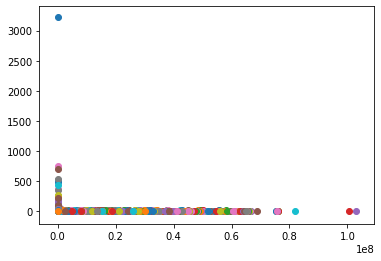

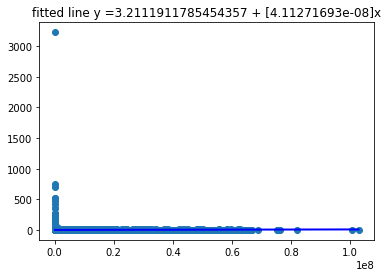

In [ ]:
b1 = model.coef_
b0 = model.intercept_
abline_values = [b1 * i + b0 for i in x]
plt.scatter(x, y)
plt.plot(x, abline_values, 'b')
plt.title('fitted line y ='+str(b0)+' + '+str(b1)+'x');

In [ ]:
y_pred = model.predict(x)
print('predicted response:', y_pred, sep='\n')

predicted response:
[3.23289117 3.23289117 3.23288945 ... 3.21119355 3.21119682 3.21153037]


In [15]:
import plotly.express as px

fig = px.scatter(pool_history_df,
          x='active_stake_ada',
          y='roa',
          color='pool_id',
          size='active_stake_ada')

fig.update_xaxes(range=[0, 100])
fig.show()

KeyboardInterrupt: 

(4.0, 0.0)

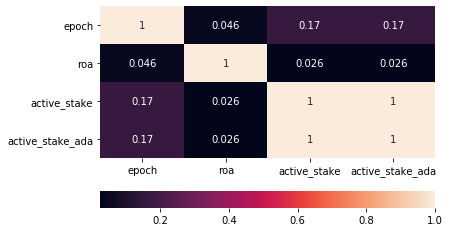

In [ ]:

ax = sns.heatmap(pool_history_df.corr(), annot = True,  cbar_kws= {'orientation': 'horizontal'} )
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Multiple Rergression 

# Logarithmic Regression

# Polynomial Regression

# Advanced Linear Regression With statsmodels
